In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Loading and cleaning the dataset

In [3]:
movies_df = pd.read_csv('/content/drive/MyDrive/tmdb_5000_movies.csv', engine="python")
movies_df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [4]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [5]:
movies_df.describe().T

,count,mean,std,min,25%,50%,75%,max
budget,4803.0,2.904504e+07,4.072239e+07,0.0,790000.00000,1.500000e+07,4.000000e+07,3.800000e+08
id,4803.0,5.716548e+04,8.869461e+04,5.0,9014.50000,1.462900e+04,5.861050e+04,4.594880e+05
popularity,4803.0,2.149230e+01,3.181665e+01,0.0,4.66807,1.292159e+01,2.831350e+01,8.755813e+02
revenue,4803.0,8.226064e+07,1.628571e+08,0.0,0.00000,1.917000e+07,9.291719e+07,2.787965e+09
runtime,4801.0,1.068759e+02,2.261193e+01,0.0,94.00000,1.030000e+02,1.180000e+02,3.380000e+02
vote_average,4803.0,6.092172e+00,1.194612e+00,0.0,5.60000,6.200000e+00,6.800000e+00,1.000000e+01
vote_count,4803.0,6.902180e+02,1.234586e+03,0.0,54.00000,2.350000e+02,7.370000e+02,1.375200e+04


In [6]:
# return the number of duplicated data
print(movies_df.duplicated().sum())
print(movies_df.isna().sum())

0
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64


In [7]:
movies_df['runtime'].fillna(movies_df['runtime'].median(), inplace=True)
movies_df.dropna(inplace=True)

**Dealing with zero values**

In [8]:
movies_df.apply(lambda x: sum(x==0),axis=0)

budget                  151
genres                    0
homepage                  0
id                        0
keywords                  0
original_language         0
original_title            0
overview                  0
popularity                0
production_companies      0
production_countries      0
release_date              0
revenue                 206
runtime                   3
spoken_languages          0
status                    0
tagline                   0
title                     0
vote_average              6
vote_count                6
dtype: int64

In [9]:
# replacing zero values with median


def replace_median(d, columns):
  for column in columns:
    median = d[d[column] > 0][column].median()
    d[column] = d[column].replace(0, median)
  return d


movies_df = replace_median(movies_df, ['budget', 'revenue', 'runtime', 'vote_average', 'vote_count'])
movies_df.apply(lambda x: sum(x==0),axis=0)

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [10]:
movies_df = movies_df[movies_df.status == 'Released']

In [11]:
# replacing json values with list of names for each column
import json


def parse_json(json_string):
    try:
      json_obj = json.loads(json_string)
      if isinstance(json_obj, list):
        return [item['name'] for item in json_obj]
      else:
        return None
    except json.JSONDecodeError as err:
      print(err)
      return None


def extract_names(data, columns):
  for column in columns:
    data[column] = data[column].apply(parse_json)
  return data


movies_df = extract_names(movies_df, ['production_companies', 'production_countries', 'genres'])
movies_df.head(3)

<ipython-input-11-9d96eefdbad4>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].apply(parse_json)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [12]:
# adding 'profit' column (revenue - budget)
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']
movies_df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,profit
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2550965087
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,661000000
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,635674609


In [13]:
movies_df.release_date = pd.to_datetime(movies_df.release_date)
movies_df['year'] = movies_df['release_date'].dt.year

movies_df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,profit,year
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2550965087,2009
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,661000000,2007


In [14]:
movies_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'profit', 'year'],
      dtype='object')

In [15]:
# extracting useful columns
df = movies_df[ ['id', 'title', 'release_date', 'year', 'production_companies', 'production_countries', 'genres', 'original_language', 'runtime', 'popularity', 'status', 'vote_count', 'vote_average', 'budget', 'revenue', 'profit'] ]
df.head(2)

,id,title,release_date,year,production_companies,production_countries,genres,original_language,runtime,popularity,status,vote_count,vote_average,budget,revenue,profit
0,19995,Avatar,2009-12-10,2009,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]","[Action, Adventure, Fantasy, Science Fiction]",en,162.0,150.437577,Released,11800,7.2,237000000,2787965087,2550965087
1,285,Pirates of the Caribbean: At World's End,2007-05-19,2007,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],"[Adventure, Fantasy, Action]",en,169.0,139.082615,Released,4500,6.9,300000000,961000000,661000000


# Exploratory Data Analysis

In [16]:
# sum of all the profit gained from movies
print('sum of all the revenue gained from movies: ', df['revenue'].sum())
print('sum of all the budget spent on movies: ', df['budget'].sum())
print('profit of movies: ', df['revenue'].sum() - df['budget'].sum())

sum of all the revenue gained from movies:  249093384268
sum of all the budget spent on movies:  73021740216
profit of movies:  176071644052


In [17]:
# sns constants
colors = sns.color_palette("husl", 10)

<Axes: xlabel='year', ylabel='yearly_revenue'>

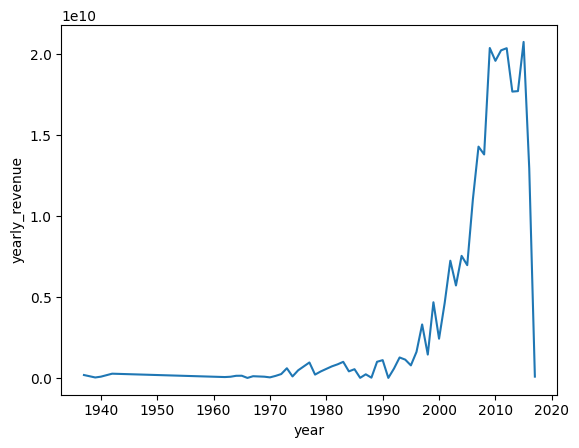

In [18]:
# profit from all movies for each year
yearly_revenue = df.groupby(['year'])['revenue'].sum().reset_index(name='yearly_revenue')
sns.lineplot(x='year', y='yearly_revenue', data = yearly_revenue)

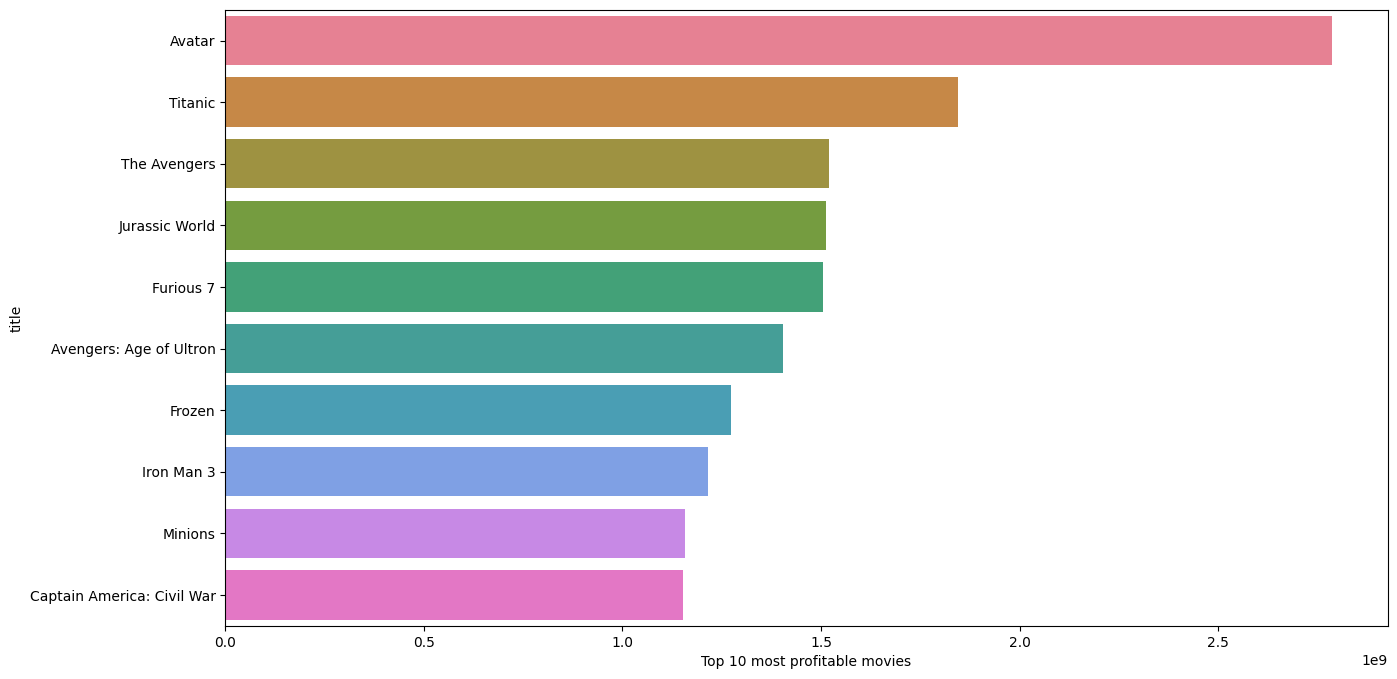

In [19]:
# top 10 movies with the most revenue
plt.figure(figsize=(15,8))
data = df.sort_values('revenue', ascending=False)[:10]
sns.barplot(x = 'revenue', y ='title', data=data, orient="h", palette=colors, hue='title')
plt.xlabel("Top 10 most profitable movies")
plt.show()

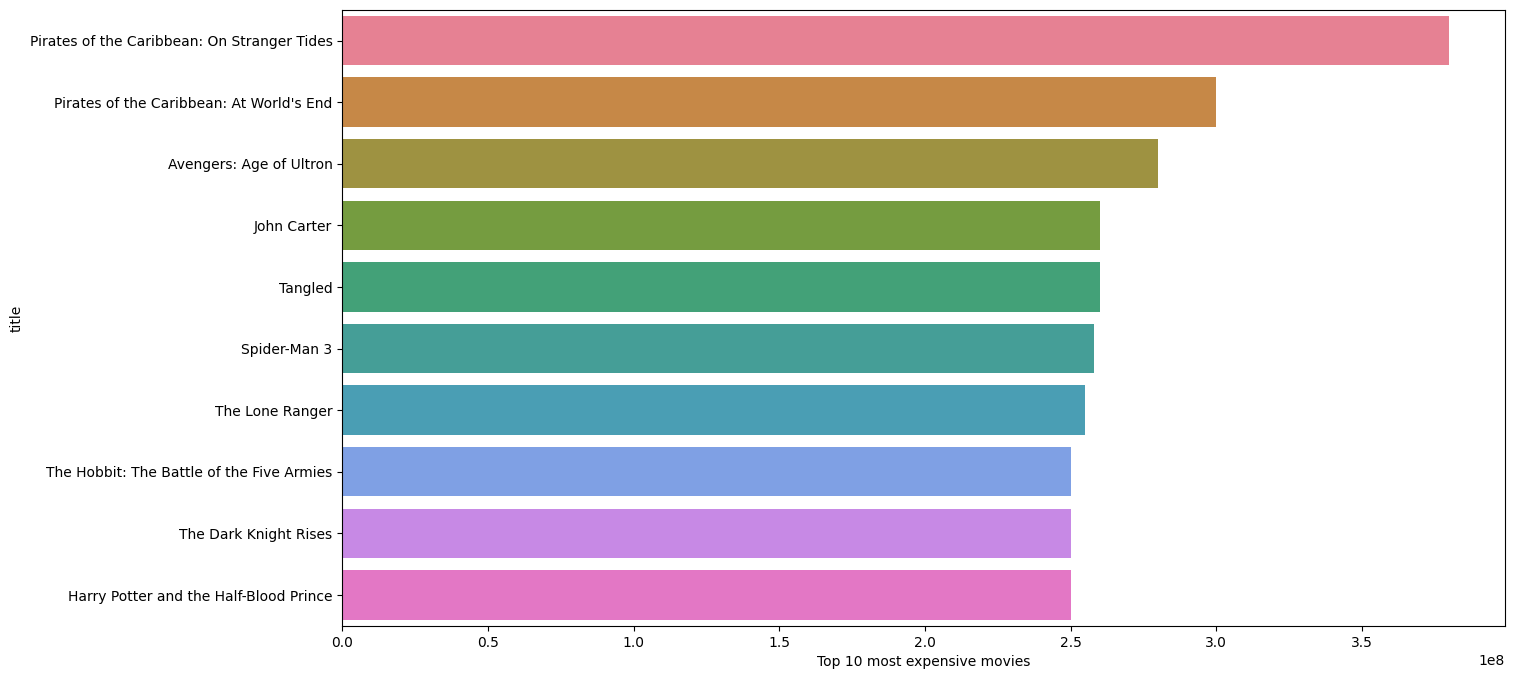

In [20]:
# top 10 most expensive movies
plt.figure(figsize=(15,8))
data = df.sort_values('budget', ascending=False)[:10]
sns.barplot(x = 'budget', y = 'title', data=data, palette=colors, orient="h", hue='title')
plt.xlabel("Top 10 most expensive movies")
plt.show()

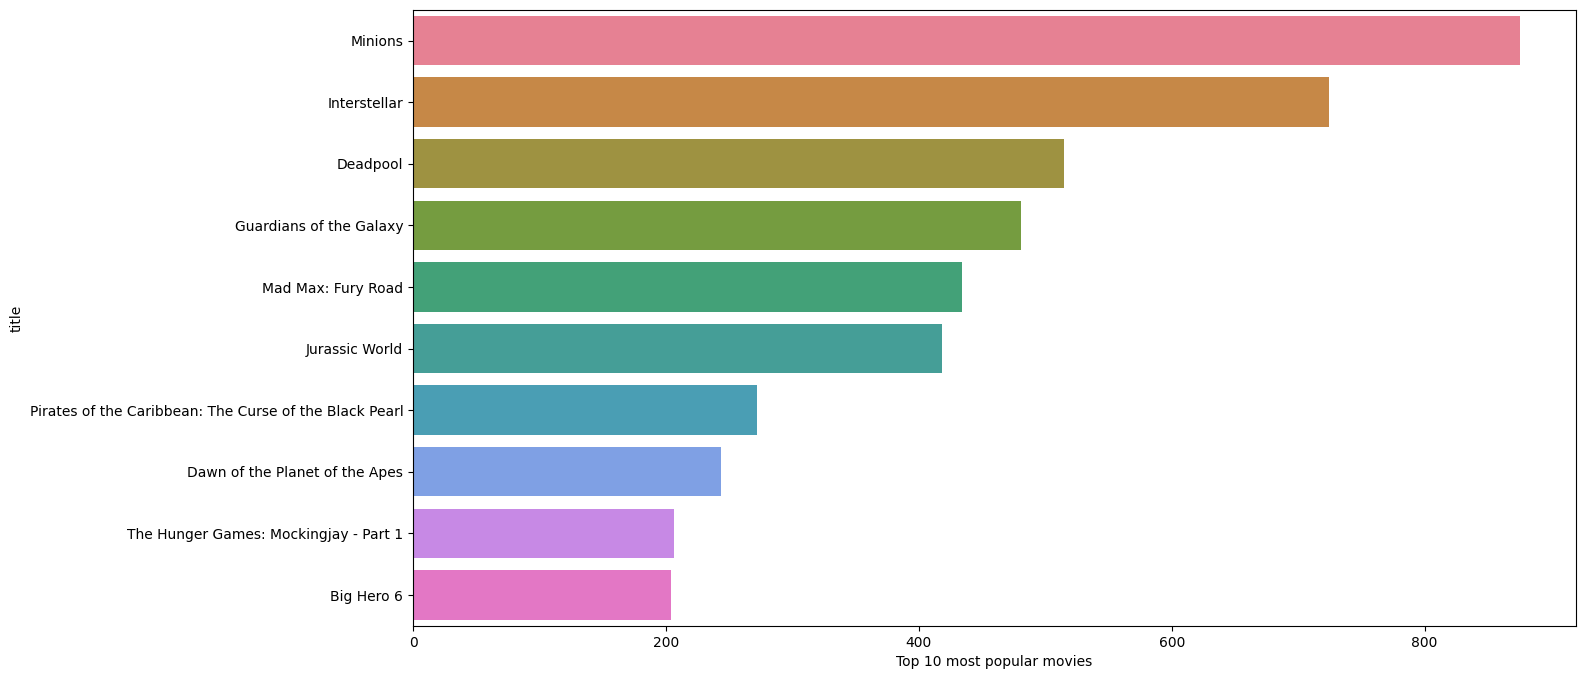

In [21]:
# top 10 most popular movies
plt.figure(figsize=(15,8))
data = df.sort_values('popularity', ascending=False)[:10]
sns.barplot(x = 'popularity', y = 'title', data=data, palette=colors, orient="h", hue='title')
plt.xlabel("Top 10 most popular movies")
plt.show()

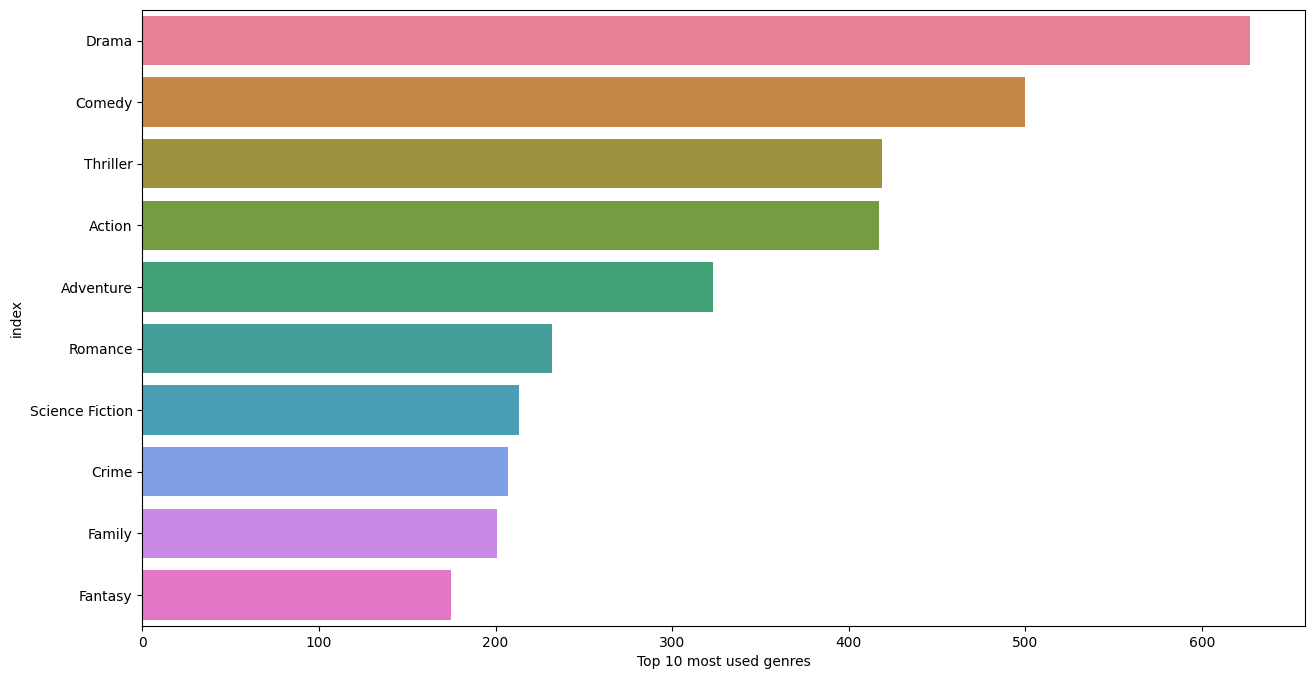

In [22]:
# generes
genre_count = df['genres'].explode().dropna().value_counts().reset_index(name='count')

plt.figure(figsize=(15,8))
data = genre_count.sort_values('count', ascending=False)[:10]
sns.barplot(x = 'count', y = 'index', data=data, palette=colors, orient="h", hue='index')
plt.xlabel("Top 10 most used genres")
plt.show()

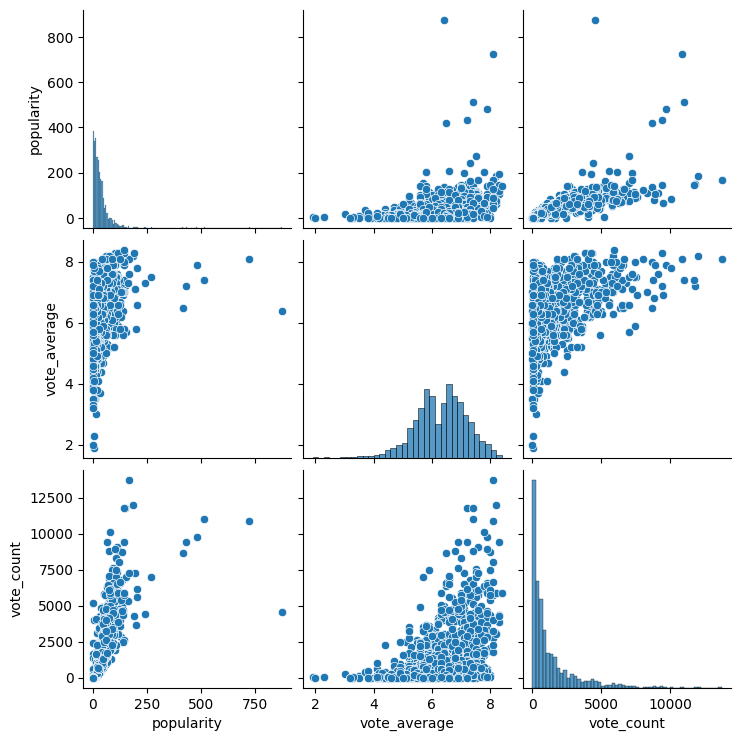

In [33]:
sns.pairplot(df[['popularity', 'vote_average', 'vote_count']])
plt.show()

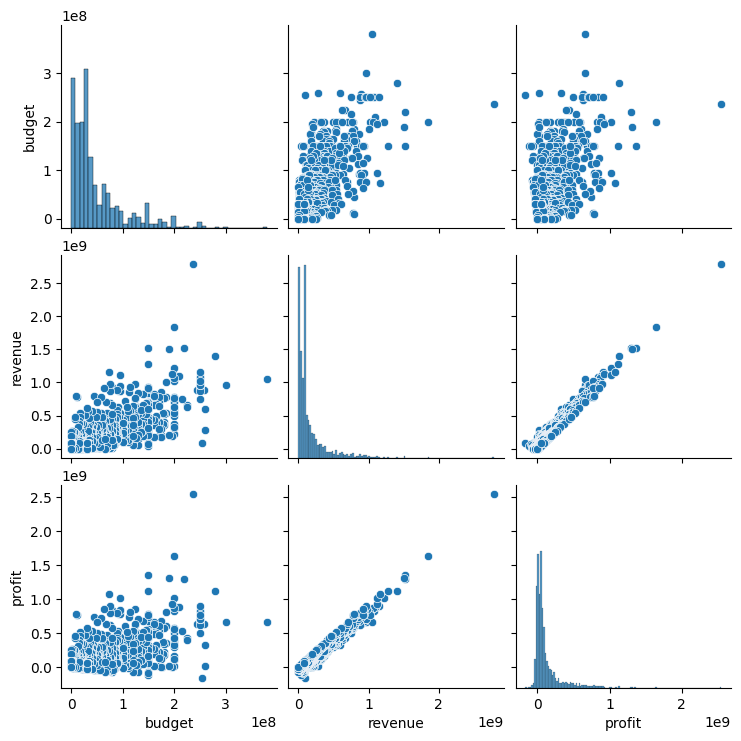

In [34]:
sns.pairplot(df[['budget', 'revenue', 'profit']])
plt.show()

# Data Modelling

In [23]:
credits_df = pd.read_csv('/content/drive/MyDrive/tmdb_5000_credits.csv', engine="python")
credits_df.dropna(inplace=True)
credits_df.head(3)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [24]:
# we need director, genre, actor/ress

In [25]:
def get_director(json_string):
    try:
      json_obj = json.loads(json_string)
      d = None
      if isinstance(json_obj, list):
        for crew in json_obj:
          if crew['job'] == 'Director':
            d = int(crew['id'])
        return d
      else:
        return None
    except json.JSONDecodeError as err:
      print(err)
      return None


def get_first_actor(json_string):
    try:
      json_obj = json.loads(json_string)
      a = None
      if isinstance(json_obj, list):
        for cast in json_obj:
          if cast['order'] == 0:
            a = int(cast['id'])
        return a
      else:
        return None
    except json.JSONDecodeError as err:
      print(err)
      return None

credits_df['crew'] = credits_df['crew'].apply(get_director)
# credits_df['crew']
credits_df['cast'] = credits_df['cast'].apply(get_first_actor)
# credits_df['cast']

In [26]:
credits_df

,movie_id,title,cast,crew
0,19995,Avatar,65731.0,2710
1,285,Pirates of the Caribbean: At World's End,85.0,1704
2,206647,Spectre,8784.0,39
3,49026,The Dark Knight Rises,3894.0,525
4,49529,John Carter,60900.0,7
...,...,...,...,...
932,752,V for Vendetta,524.0,11266
933,6038,Shanghai Knights,18897.0,42994
934,9975,Curious George,23659.0,61290
935,11451,Herbie Fully Loaded,49265.0,7312


In [27]:
new_df = pd.concat([df.genres.str.join('|').str.get_dummies(), df], axis=1)
new_df.head(3)

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,...,genres,original_language,runtime,popularity,status,vote_count,vote_average,budget,revenue,profit
0,1,1,0,0,0,0,0,0,1,0,...,"[Action, Adventure, Fantasy, Science Fiction]",en,162.0,150.437577,Released,11800,7.2,237000000,2787965087,2550965087
1,1,1,0,0,0,0,0,0,1,0,...,"[Adventure, Fantasy, Action]",en,169.0,139.082615,Released,4500,6.9,300000000,961000000,661000000
2,1,1,0,0,1,0,0,0,0,0,...,"[Action, Adventure, Crime]",en,148.0,107.376788,Released,4466,6.3,245000000,880674609,635674609


In [28]:
new_df.columns

Index(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War',
       'Western', 'id', 'title', 'release_date', 'year',
       'production_companies', 'production_countries', 'genres',
       'original_language', 'runtime', 'popularity', 'status', 'vote_count',
       'vote_average', 'budget', 'revenue', 'profit'],
      dtype='object')

In [29]:
merged_df = pd.merge(new_df, credits_df, left_on=['id'], right_on=['movie_id'], how='inner')
merged_df.drop(columns=['movie_id'], inplace=True)
merged_df

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,...,popularity,status,vote_count,vote_average,budget,revenue,profit,title_y,cast,crew
0,1,1,0,0,0,0,0,0,1,0,...,150.437577,Released,11800,7.2,237000000,2787965087,2550965087,Avatar,65731.0,2710
1,1,1,0,0,0,0,0,0,1,0,...,139.082615,Released,4500,6.9,300000000,961000000,661000000,Pirates of the Caribbean: At World's End,85.0,1704
2,1,1,0,0,1,0,0,0,0,0,...,107.376788,Released,4466,6.3,245000000,880674609,635674609,Spectre,8784.0,39
3,1,0,0,0,1,0,1,0,0,0,...,112.312950,Released,9106,7.6,250000000,1084939099,834939099,The Dark Knight Rises,3894.0,525
4,1,1,0,0,0,0,0,0,0,0,...,43.926995,Released,2124,6.1,260000000,284139100,24139100,John Carter,60900.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,0,0,0,1,0,0,1,1,0,0,...,38.629763,Released,909,6.5,50000000,120081841,70081841,We Bought a Zoo,1892.0,11649
478,1,1,0,0,0,0,1,0,0,0,...,32.693093,Released,1486,5.9,50000000,155446362,105446362,Knowing,2963.0,21085
479,0,0,0,1,0,0,1,0,0,0,...,37.990705,Released,2443,7.0,50000000,142851197,92851197,"Crazy, Stupid, Love.",4495.0,56412
480,0,0,0,0,0,0,1,0,0,0,...,46.180421,Released,1381,7.0,50000000,110206216,60206216,Moneyball,287.0,5345


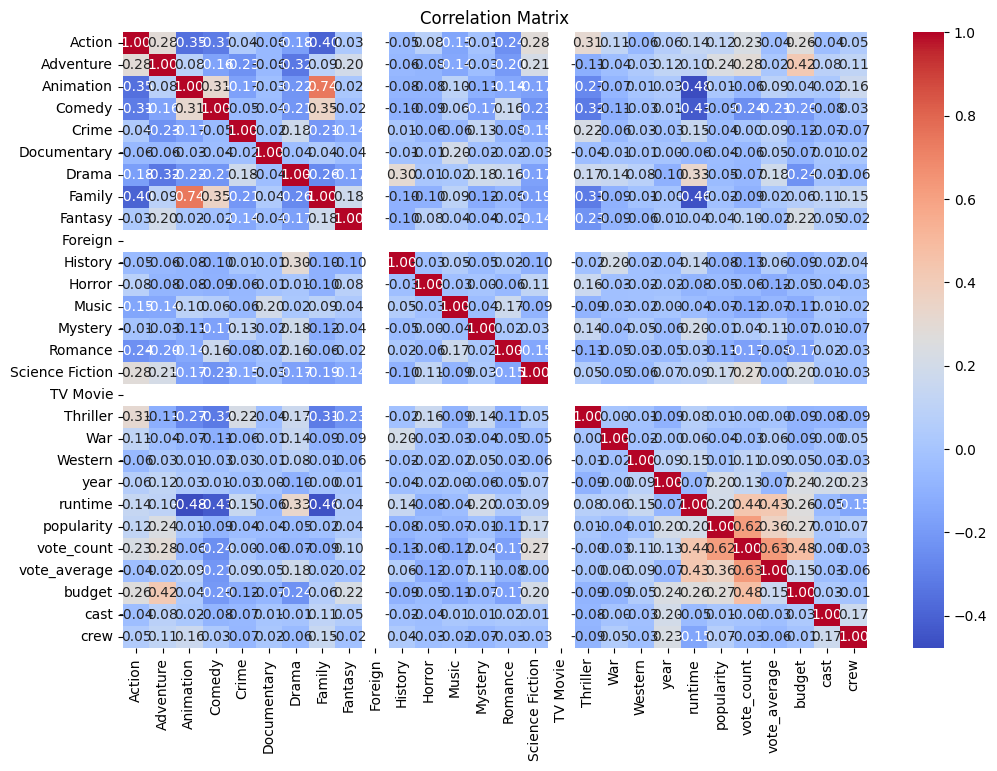

In [31]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(merged_df[merged_df.select_dtypes(include=["int64", "float64"]).columns.drop(['revenue', 'profit', 'id'])].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()